In [209]:
pwd

'/home/roger/src/python/liveproject/discovering-disease-outbreaks-base-master'

In [462]:
from unidecode import unidecode
from geonamescache import GeonamesCache
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


gc = GeonamesCache()
cn = {}
city_names = []
states = []
state_names = []

cities = gc.get_cities()
city_id = list(cities.keys())[0]
#print(city_id)
#print(cities[city_id])

us_cities = [city for city in cities.values()
             if city['countrycode'] == 'US']
num_us_cities = len(us_cities)
#print(f"GeoNamesCache holds data for {num_us_cities} US cities.")

matched_cities_by_name = gc.get_cities_by_name('Rio de Janeiro')
#print(matched_cities_by_name)

states = gc.get_us_states()
cn = gc.get_countries_by_names()
countries = gc.get_countries()

matched_cities_list = gc.get_cities_by_name('San Francisco')
for i, san_francisco in enumerate(matched_cities_list):
    city_info = list(san_francisco.values())[0]
    country_code = city_info['countrycode']
    country = gc.get_countries()[country_code]['name']
   # print(f"The San Francisco at index {i} is located in {country}")

def readHeadlines(filename):

    headdata = []
    
    prob = open("prob.txt", 'w')
    with open(filename, 'r', encoding='utf8') as f:
        lnum = 0
        for line in f:
            lnum += 1
            cityname = ""
            countryname = ""
            statename = ""
            best = []
            
            while line.find("'s") >= 0:
                line = line.replace("'s", '')
                #print("----" + line)
            clean = ''.join(e for e in line.rstrip() if e.isalnum() or e == ' ')
            #print(clean)
            words = clean.split()
            
            matched_cities_list = getcity (words)
            #print("matched cities")
            #print(matched_cities_list)
            #print(" ")
            
            if len(matched_cities_list) > 0:
                best = matched_cities_list[0]
                if len(matched_cities_list) > 1:   
                    #print ("More than 1 city match")
                    #print (matched_cities_list)
                    best = max(matched_cities_list, key=lambda x: list(x.values())[0]['population'])
                    
                #print(best)
                #cityinfo = list(best.values())
                cityinfo = list(best.values())[0]
                #print (cityinfo)
                cityname = cityinfo['name']
                #print ("cityname " + cityname)
                lat = cityinfo['latitude']
                lon = cityinfo['longitude']
                country_code = cityinfo['countrycode']
                countryname = gc.get_countries()[country_code]['name']
                if country_code == 'US':
                    statename = cityinfo['admin1code']
            
            
            if len(cityname) == 0 and len(countryname) == 0 and len(statename) == 0:
                #print("write problem line")
                prob.write(line)
                continue
            
            headdata.append([line.rstrip(), countryname, cityname, lat, lon, country_code])
            #print(str(lnum) + '-> city=' + cityname + ' ' + 'statename=' + statename + ' ' + 'country=' + countryname)
            
    return headdata

def getcity(words):
    ret = ''
    prefix = ''
    mcl = ''
    
    if len(words) > 4:
        for i in range(len(words) - 3):
            wtmp = words[i] + ' ' + words[i+1] + ' ' + words[i+2] + ' ' + words[i+3]
            #print(wtmp)
            mcl = gc.get_cities_by_name(citymap(wtmp))
            if len(mcl) > 0:
                #print("1 getcity returning " + ret)
                return mcl
    if len(words) > 3:
        for i in range(len(words) - 2):
            wtmp = words[i] + ' ' + words[i+1] + ' ' + words[i+2]
            #print(wtmp)
            mcl = gc.get_cities_by_name(citymap(wtmp))
            if len(mcl) > 0:
                #print("2 getcity returning " + ret)
                return mcl
    if len(words) > 2:
        for i in range(len(words) - 1):
            wtmp = words[i] + ' ' + words[i+1]
            #print(wtmp)
            mcl = gc.get_cities_by_name(citymap(wtmp))
            #print(mcl)
            if len(mcl) > 0:
                #print("3 getcity returning " + ret)
                return mcl
    if len(words) > 0:
        for i in range(len(words)):
            w = words[i]
            mcl = gc.get_cities_by_name(citymap(w))
            if len(mcl) > 0:
                break
        
    #print("4 returning mcl")
    return mcl

def citymap(city):
    map = {"Sao Paulo": "São Paulo", "Geneve": "Genève", "St Louis": "St. Louis", "Cebu": "Cebu City",
           "Chicagos": "Chicago", "Bogota": "Bogotá", "Antigua": "Antigua Guatemala",
           "Rio De Janeiro": "Rio de Janeiro", "Brasilia": "Brasília", "Hillsborough": "Hillsboro",
           "Quebec": "Québec", "Cancun": "Cancún", "Mcallen": "McAllen", "Saint Johns": "St. Johns",
           "Arhus": "Aarhus", "Niteroi": "Niterói", "Joao Pessoa": "João Pessoa", "Mclean": "McLean",
           "Yaounde": "Yaoundé", "St Catharines": "St. Catharines", "Camacari": "Camaçari",
           "Montreal": "Montréal", "Druid Hills": "North Druid Hills", "Ribeirao Preto": "Ribeirão Preto",
           "Custodia": "Custódia", "Cantu": "Cantù", "Medellin": "Medellín", "Ciudad Acuña": "Ciudad Acuña",
           "Panama Citys": "Panama City", "Sao Jose": "São José"}
    
    #print("citymap " + city)
    
    if city in map.keys():
        #print("citymap returns " + map[city])
        return map[city]
    
    return city
    

def getcountry(words):
    print("getcountry")
    if len(words) > 2:
        for i in range(len(words) - 1):
            wtmp = words[i] + words[i+1]
            #print(wtmp)
            if cn.get(wtmp) != None:
                return wtmp
    if len(words) >= 1:
        for i in range(len(words)):
            w = words[i]
            #print(w)
            if cn.get(w) != None:
                return w
    return ""
            
#readHeadlines('probcopy.txt')                    
                    
headdata = readHeadlines('data/headlines.txt')

print("DONE")



                

DONE


                                  Headline        Country           City  \
0                 Zika Outbreak Hits Miami  United States          Miami   
1          Could Zika Reach New York City?  United States  New York City   
2        First Case of Zika in Miami Beach  United States    Miami Beach   
3  Mystery Virus Spreads in Recife, Brazil         Brazil         Recife   
4  Dallas man comes down with case of Zika  United States         Dallas   

        Lat       Lon Country Code  
0  25.77427 -80.19366           US  
1  40.71427 -74.00597           US  
2  25.79065 -80.13005           US  
3  -8.05389 -34.88111           BR  
4  32.78306 -96.80667           US  
4
US length 310
292
292
Albany 2
Fairfield 2
Greenville 2
Hollywood 2
Jefferson 2
Miami 4
Monroe 4
Norwalk 2
Orange 2
Palm Springs 2
Panama City 2
Richmond 2
Rochester 2
San Jose 2
292


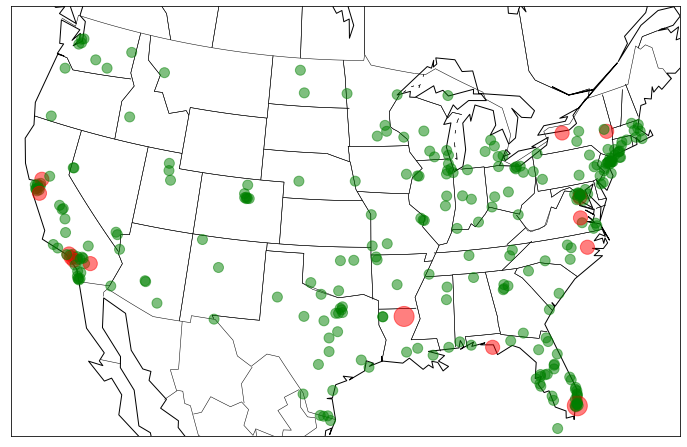

In [574]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def greater_than_one(x):
    if x > 1:
        return 0
    else:
        return 1

headdata = readHeadlines('data/headlines.txt')

df = pd.DataFrame(headdata, columns=['Headline', 'Country', "City", "Lat", "Lon", "Country Code"])
print(df.head())

#is_us = df['Country'] == "United States"
#us = df[df.Country.eq('United States')]

us = df[df['Country'] == 'United States'] 
#print(us.head())

ucity = {k: v for (k, v) in us.groupby('City')}

print(len(ucity['Miami']))

fig = plt.figure(figsize=(12, 8))
map_lcc = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119,
                  llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33,
                  lat_2=45)

la = us.Lat.tolist()
#la = ucity.Lat.tolist()
#print(us)
print("US length " + str(len(la)))

loccount = {}
usc = us.City.tolist()

for i in range(0, len(usc)):
    c = usc[i]
#    print(c)
    if len(c) > 0:
        if c in loccount.keys():
            loccount[c] += 1
        else:
            loccount[c] = 1
            
print(len(loccount))
            
#for c in loccount.keys():
#    if loccount[c] > 1:
#        print (c + " " + str(loccount[c]))

s = [100 * len(ucity[c]) for c in ucity.keys()]
print(len(s))
#print(s)
for c in ucity.keys():
    if len(ucity[c]) > 1:
        print(c + ' ' + str(len(ucity[c])))

#for c in loccount.keys():
    #print(colormap[greater_than_one(loccount[c])])
    #print(loccount[c])

colormap = np.array(['r', 'g', 'b'])
x = [colormap[greater_than_one(len(ucity[c]))] for c in ucity.keys()]
print(len(x))

la1 = []
lo1 = []

for c in ucity.keys():
#    print(ucity[c].Lat)
    la1.append(ucity[c].Lat[:1])
    lo1.append(ucity[c].Lon[:1])

# no dups allowed us.set_index('City', inplace=True)
#for cit in loccount.keys():
#    print(us.loc[cit: 'Lat'])
#    la1.append(us.loc[cit: 'Lat'])
#    lo1.append(us.loc[cit: 'Lon'])
    
#print(la1)

map_lcc.drawcoastlines()
map_lcc.drawstates()
map_lcc.drawcountries()

lons, lats = map_lcc(lo1, la1)
#print(lats)
#print(lons)
#map_lcc.plot(lons[0],lats[0],'bo', latlon=True)  # plot a blue dot there

map_lcc.scatter(lons, lats, s=s, c=x, alpha=0.5, zorder=5)
#map_lcc.scatter(lons, lats, latlon=True, s=200,  alpha=0.5, marker = 'o', color='r', zorder=5)

plt.show()


df.to_csv('pd.csv', index=False)

